In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
customer_data = pd.read_csv('/home/swostika/Documents/datascience/ds_projects/market_basket/data/archive/Mall_Customers.csv')

In [8]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
customer_data.shape

(200, 5)

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
X = customer_data.iloc[:,[3,4]].values

In [16]:
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
def plot_distributions(df):
    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Plot the distribution of Age
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], kde=True)
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot the distribution of Annual Income
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Annual Income (k$)'], kde=True)
    plt.title('Distribution of Annual Income')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Frequency')
    plt.show()

    # Plot the distribution of Spending Score
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Spending Score (1-100)'], kde=True)
    plt.title('Distribution of Spending Score')
    plt.xlabel('Spending Score (1-100)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot pairplot to view relationships between features
    sns.pairplot(df)
    plt.title('Pairplot of All Features')
    plt.show()

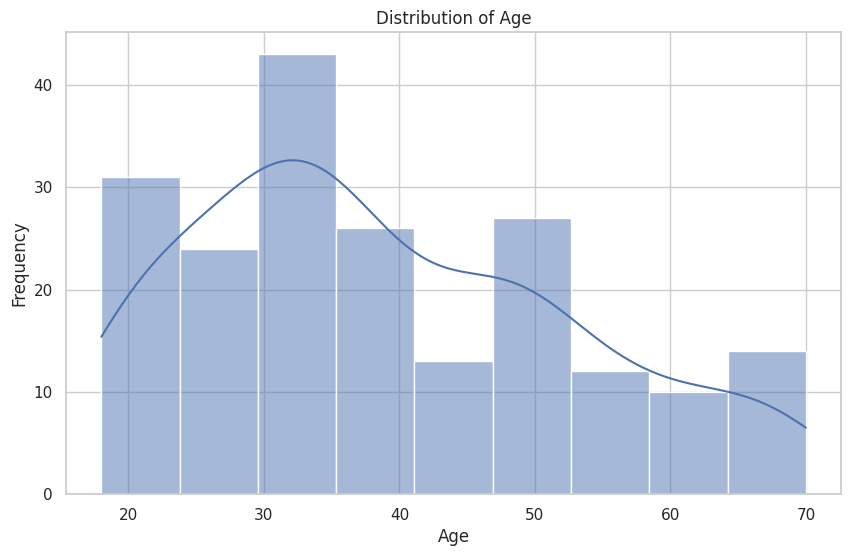

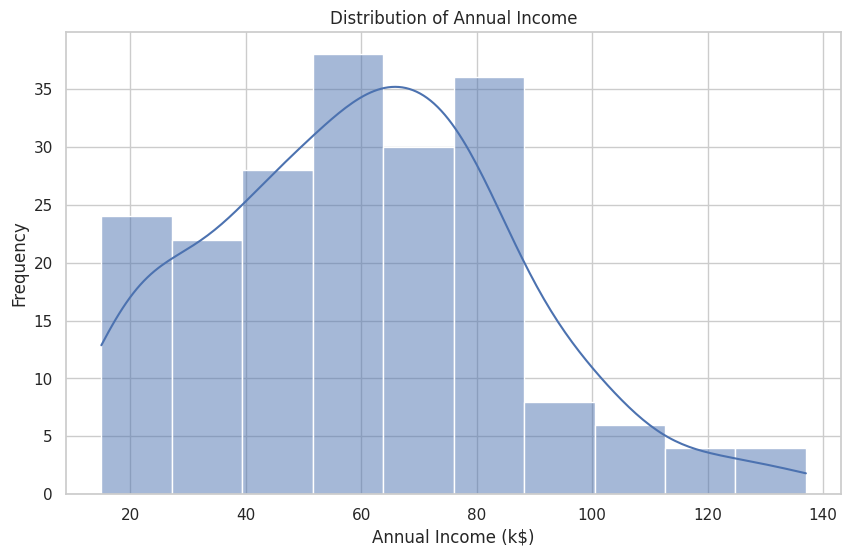

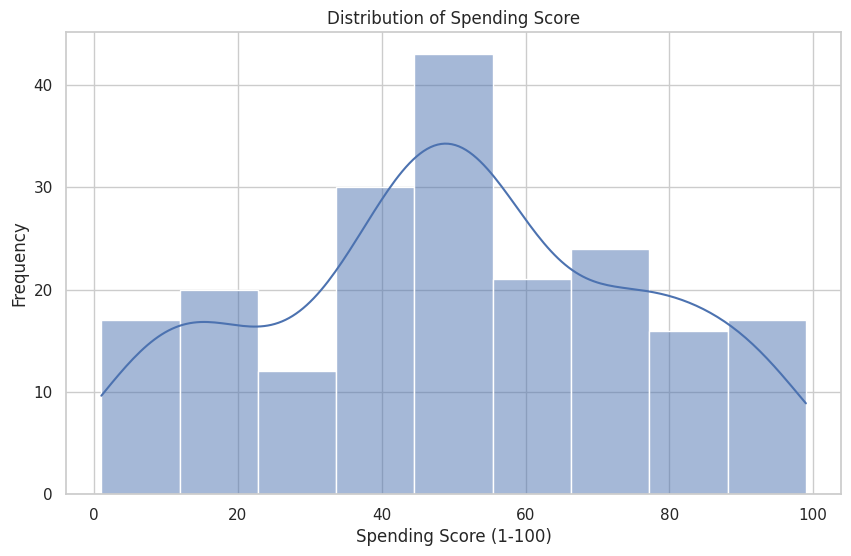

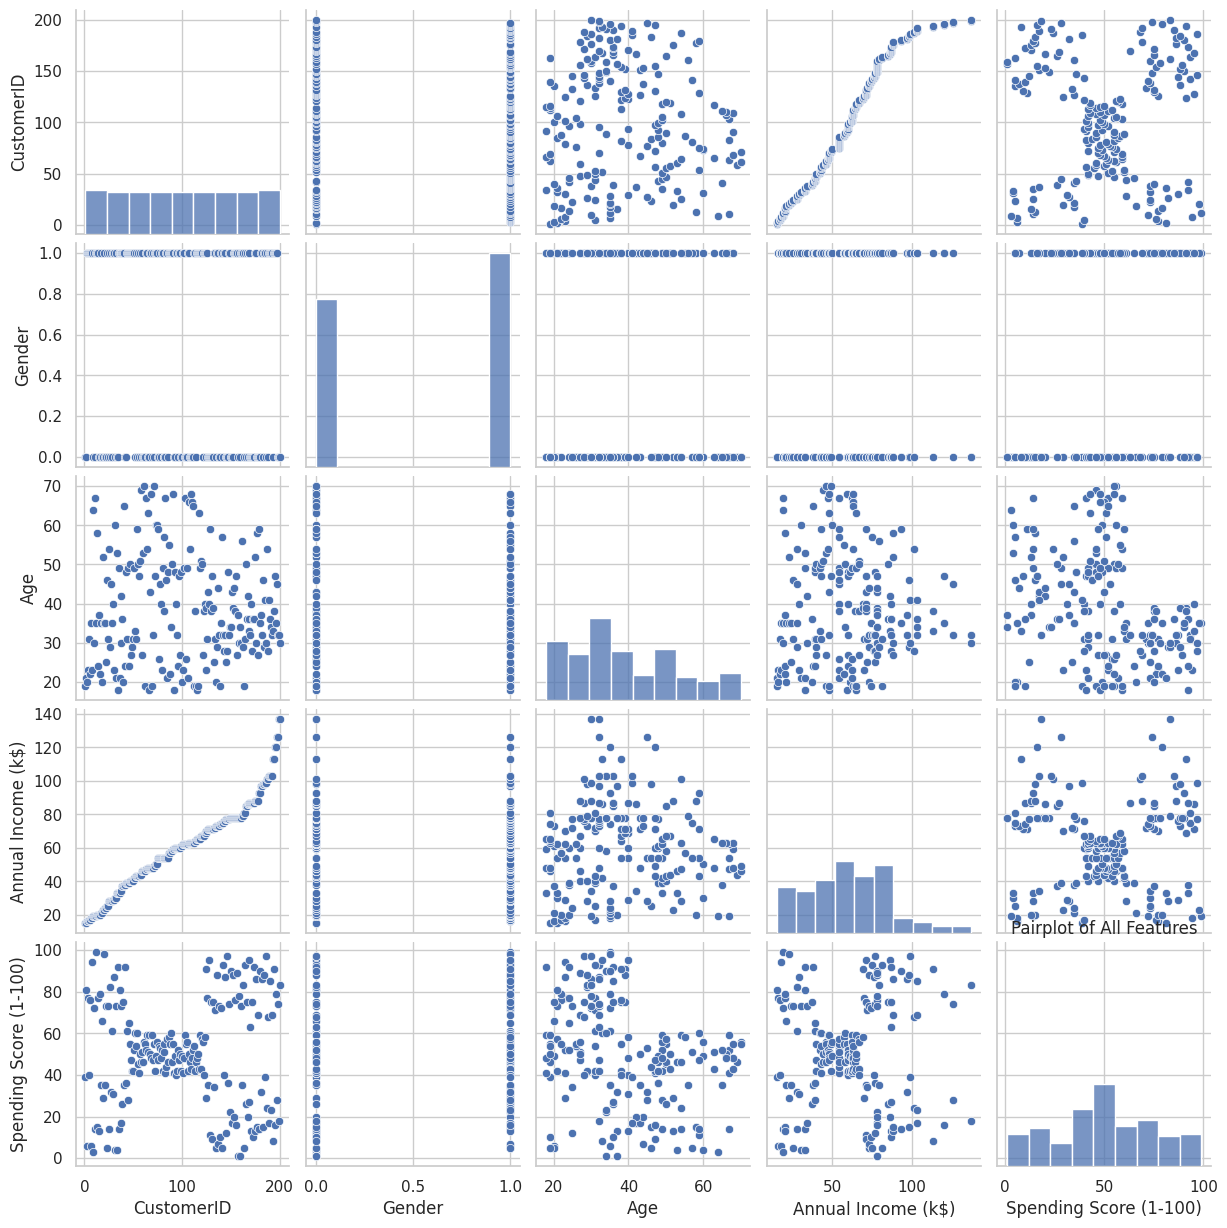

In [20]:
df=customer_data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    
    # Plot the distributions of the data
plot_distributions(df)


In [3]:

def preprocess_data(df):
    """
    Preprocess the data by encoding categorical variables and scaling the features.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    np.ndarray: The preprocessed and scaled feature matrix.
    """
    # Encode categorical variables (Gender: Male=0, Female=1)
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    if 'CustomerID' in df.columns:
        df = df.drop(columns=['CustomerID'])
    # Select features for clustering
    X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
    
    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# from helper.utils import preprocess_data
import sys,os
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# Example single-row DataFrame (replace with actual data)
single_row_df = pd.DataFrame({
    'CustomerID': [1],
    'Gender': ['Male'],
    'Age': [28],
    'Annual Income (k$)': [50],
    'Spending Score (1-100)': [60]
})

# Preprocess the single-row DataFrame
X_scaled_single_row = preprocess_data(single_row_df)

print("Preprocessed and Scaled Single Row:")
print(X_scaled_single_row)


Preprocessed and Scaled Single Row:
[[0. 0. 0. 0.]]
